In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ortho_group
from procrustes import orthogonal
from procrustes import orthogonal_2sided
import cv2 as cv2
import matplotlib.pyplot as plt

In [2]:
# Fly wings example (Klingenberg, 2015 | https://en.wikipedia.org/wiki/Procrustes_analysis)
arr1 = np.array([[588.0, 443.0], [178.0, 443.0], [56.0, 436.0], [50.0, 376.0], [129.0, 360.0], [15.0, 342.0], [92.0, 293.0], [79.0, 269.0], [276.0, 295.0], [281.0, 331.0], [785.0, 260.0], [754.0, 174.0], [405.0, 233.0], [386.0, 167.0], [466.0, 59.0]])
arr2 = np.array([[477.0, 557.0], [130.129, 374.307], [52.0, 334.0], [67.662, 306.953], [111.916, 323.0], [55.119, 275.854], [107.935, 277.723], [101.899, 259.73], [175.0, 329.0], [171.0, 345.0], [589.0, 527.0], [591.0, 468.0], [299.0, 363.0], [306.0, 317.0], [406.0, 288.0]])

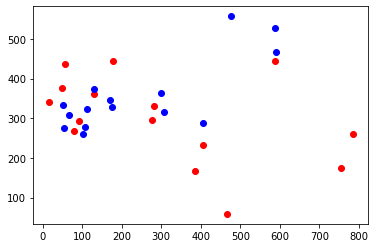

In [3]:
plt.scatter(arr1[:,0], arr1[:,1], c = 'red')
plt.scatter(arr2[:,0], arr2[:,1], c = 'blue')

In [4]:
# orthogonal Procrustes analysis with translation
result = orthogonal(arr1, arr2, scale=False, translate=False)

In [5]:
result

 error: 163892.47950113835
 new_a: array([[588., 443.],
       [178., 443.],
       [ 56., 436.],
       [ 50., 376.],
       [129., 360.],
       [ 15., 342.],
       [ 92., 293.],
       [ 79., 269.],
       [276., 295.],
       [281., 331.],
       [785., 260.],
       [754., 174.],
       [405., 233.],
       [386., 167.],
       [466.,  59.]])
 new_b: array([[477.   , 557.   ],
       [130.129, 374.307],
       [ 52.   , 334.   ],
       [ 67.662, 306.953],
       [111.916, 323.   ],
       [ 55.119, 275.854],
       [107.935, 277.723],
       [101.899, 259.73 ],
       [175.   , 329.   ],
       [171.   , 345.   ],
       [589.   , 527.   ],
       [591.   , 468.   ],
       [299.   , 363.   ],
       [306.   , 317.   ],
       [406.   , 288.   ]])
     s: None
     t: array([[ 0.96420467,  0.2651591 ],
       [-0.2651591 ,  0.96420467]])

In [6]:
transformed_matrix_2 = np.dot(result.new_a, result.t)
transformed_matrix_2

array([[449.4868673 , 583.05622038],
       [ 54.16295117, 474.34098992],
       [-61.61390531, 435.24214717],
       [-51.48958743, 375.79891217],
       [ 28.92512736, 381.31920619],
       [-76.22134164, 333.73538482],
       [ 11.01521405, 306.90660641],
       [  4.84437166, 280.31862597],
       [187.89855578, 357.62428992],
       [183.17385159, 393.66145365],
       [687.95930304, 458.84310757],
       [680.87264065, 367.70157359],
       [328.72082277, 332.04912389],
       [327.90143449, 263.37359256],
       [433.67499103, 180.45221572]])

In [7]:
rot = result.t
z = np.zeros((2,1))
rot = np.append(rot, z, axis = 1) 
rot = np.append(rot, [[0,0,0]], axis=0)
# rot = np.append(rot, [[0,0,0]], axis = 1)
rot

array([[ 0.96420467,  0.2651591 ,  0.        ],
       [-0.2651591 ,  0.96420467,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [8]:
from scipy.spatial.transform import Rotation   

## first transform the matrix to euler angles
r =  Rotation.from_matrix(rot)
angles = r.as_euler("zyx",degrees=True)

In [9]:
angles

array([-20.52938475,   0.        ,   0.        ])

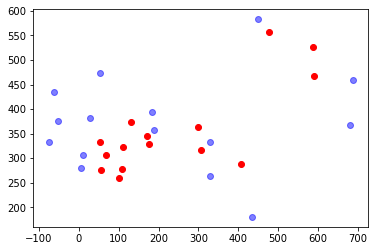

In [10]:
import matplotlib.pyplot as plt
plt.scatter(result.new_b[:,0], result.new_b[:,1], c='red')
plt.scatter(transformed_matrix_2[:,0], transformed_matrix_2[:,1], c= 'blue', alpha = 0.5)